# Dependencies

In [34]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd

# De-serializing data

In [35]:
electric = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/Assessment/ML&Business_Analytics/serialized files/electric.pkl', 'rb'))
electric

,user_id,Channel,TotalTransactionAmount,Tx_Count,DaysSinceLastTrans,reseller_id,superdealer_id,Product_ServiceProvider,Product_Type,Product_Category
0,1191,8.0,532700,137,30,1130.0,18.0,Jos Electric,Postpaid,Electricity
2,1168,8.0,548300,114,30,1130.0,18.0,Jos Electric,Postpaid,Electricity
4,1168,8.0,211700,75,30,1130.0,18.0,Jos Electric,Prepaid,Electricity
6,1183,8.0,276700,134,30,1130.0,18.0,Jos Electric,Prepaid,Electricity
12,1189,8.0,200150,108,30,1130.0,18.0,Jos Electric,Prepaid,Electricity
...,...,...,...,...,...,...,...,...,...,...
2609,2348,8.0,165300,77,70,1130.0,18.0,Jos Electric,Prepaid,Electricity
2629,2421,8.0,8000,4,31,1130.0,18.0,Jos Electric,Prepaid,Electricity
2631,49,8.0,1600,8,325,0.0,0.0,Ikeja Electric,Prepaid,Electricity
2632,49,8.0,200,1,329,0.0,0.0,Ikeja Electric,Postpaid,Electricity


# Preprocessing

In [36]:
electric = electric[['user_id', 'TotalTransactionAmount', 'Tx_Count', 'DaysSinceLastTrans']]
electric

,user_id,TotalTransactionAmount,Tx_Count,DaysSinceLastTrans
0,1191,532700,137,30
2,1168,548300,114,30
4,1168,211700,75,30
6,1183,276700,134,30
12,1189,200150,108,30
...,...,...,...,...
2609,2348,165300,77,70
2629,2421,8000,4,31
2631,49,1600,8,325
2632,49,200,1,329


In [37]:
electric.describe()

,user_id,TotalTransactionAmount,Tx_Count,DaysSinceLastTrans
count,99.000000,9.900000e+01,99.000000,99.000000
mean,807.343434,1.790094e+05,26.646465,163.868687
std,689.323140,1.005267e+06,42.061013,116.552138
min,18.000000,5.000000e+00,1.000000,30.000000
25%,417.000000,3.212500e+03,2.000000,37.000000
50%,553.000000,2.700000e+04,7.000000,155.000000
75%,1175.500000,9.268650e+04,28.000000,281.500000
max,2669.000000,9.988000e+06,171.000000,329.000000


In [38]:
elec_customers = electric.groupby(['user_id']).agg({
    'TotalTransactionAmount': 'sum',
    'Tx_Count': 'count',
    'DaysSinceLastTrans' : 'sum'
})

elec_customers.rename(columns={'TotalTransactionAmount': 'Amount',
                                 'Tx_Count': 'Freq',
                                'DaysSinceLastTrans': 'Re'}, inplace=True)
elec_customers

,Amount,Freq,Re
user_id,,,
18,8400,2,536
49,10800,3,983
56,103640,4,1182
86,1227033,10,1577
172,95600,4,694
183,155000,1,175
417,913000,2,620
419,263500,2,636
422,9998000,2,500


In [39]:
print(elec_customers.Re.skew())
print(elec_customers.Freq.skew())
print(elec_customers.Amount.skew())

1.9729877803273275
3.920105632613466
7.257254253804292


## Converting Data to Gaussian Distribution

### Visualization

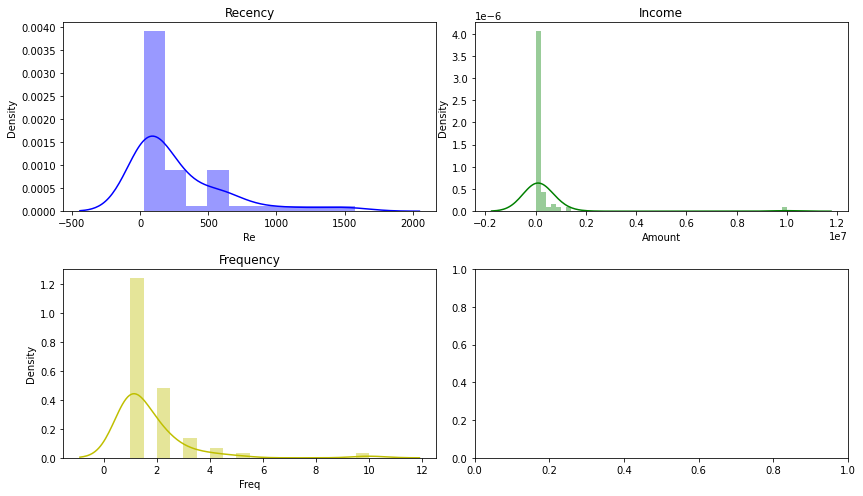

In [40]:
import warnings
warnings.filterwarnings('ignore')

fig, ax = plt.subplots(2, 2, figsize=(12, 7))

fig = sns.distplot(elec_customers.Re, color='b', ax=ax[0, 0])
fig = sns.distplot(elec_customers.Amount, color='g', ax=ax[0, 1])
fig = sns.distplot(elec_customers.Freq, color='y', ax=ax[1, 0])
ax[0, 0].set_title('Recency')
ax[0, 1].set_title('Income')
ax[1, 0].set_title('Frequency')

plt.tight_layout()
plt.show()

### Log Transformation

In [41]:
log_trans = pd.DataFrame()
log_trans['Amount'] = np.log(elec_customers['Amount'])
log_trans['Freq'] = np.log(elec_customers['Freq'])
log_trans['Re'] = np.log(elec_customers['Re'])

print(log_trans.Re.skew())
print(log_trans.Freq.skew())
print(log_trans.Amount.skew())

0.31485215628884533
1.4845962589775732
-0.2206387378900395


#### After-Log-Transformation

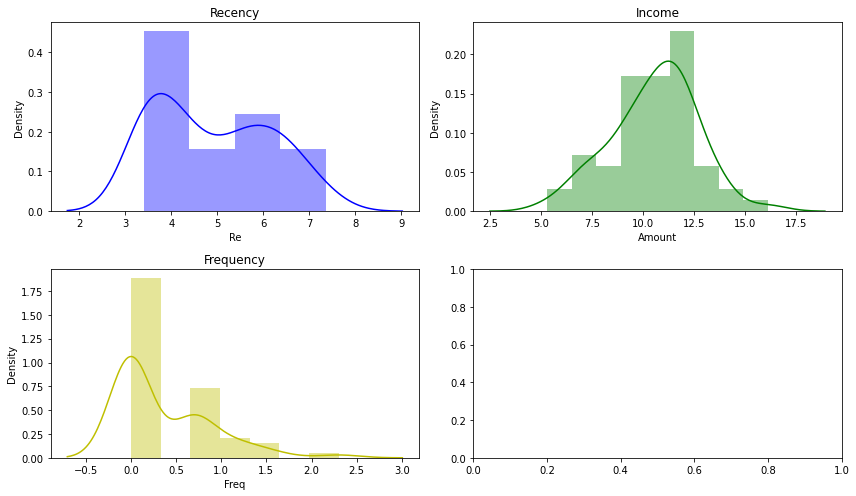

In [42]:
fig, ax = plt.subplots(2, 2, figsize=(12, 7))

fig = sns.distplot(log_trans.Re, color='b', ax=ax[0, 0])
fig = sns.distplot(log_trans.Amount, color='g', ax=ax[0, 1])
fig = sns.distplot(log_trans.Freq, color='y', ax=ax[1, 0])
ax[0, 0].set_title('Recency')
ax[0, 1].set_title('Income')
ax[1, 0].set_title('Frequency')

plt.tight_layout()
plt.show()

### BoxCox Transfromation

In [43]:
boxcox_trans = pd.DataFrame()
boxcox_trans['Amount'] = stats.boxcox(elec_customers['Amount'])[0]
boxcox_trans['Freq'] = stats.boxcox(elec_customers['Freq'])[0]
boxcox_trans['Re'] = stats.boxcox(elec_customers['Re'])[0]

print(boxcox_trans.Re.skew())
print(boxcox_trans.Freq.skew())
print(boxcox_trans.Amount.skew())

0.11011351755039261
0.5935064136508706
0.0039517404949233285


#### After-Boxcox-Transformation

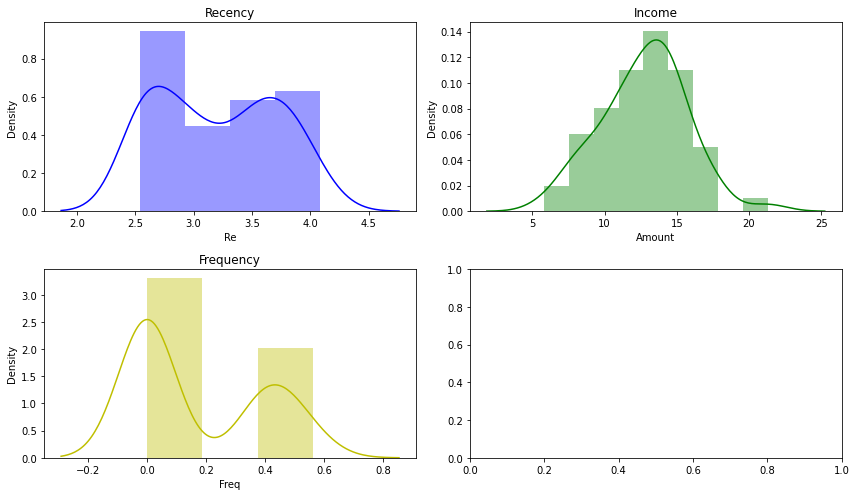

In [44]:
fig, ax = plt.subplots(2, 2, figsize=(12, 7))

fig = sns.distplot(boxcox_trans.Re, color='b', ax=ax[0, 0])
fig = sns.distplot(boxcox_trans.Amount, color='g', ax=ax[0, 1])
fig = sns.distplot(boxcox_trans.Freq, color='y', ax=ax[1, 0])
ax[0, 0].set_title('Recency')
ax[0, 1].set_title('Income')
ax[1, 0].set_title('Frequency')

plt.tight_layout()
plt.show()

### Square Root Transformation

In [45]:
square_trans = pd.DataFrame()
square_trans['Amount'] = np.sqrt(elec_customers['Amount'])
square_trans['Freq'] = np.sqrt(elec_customers['Freq'])
square_trans['Re'] = np.sqrt(elec_customers['Re'])

print(square_trans.Re.skew())
print(square_trans.Freq.skew())
print(square_trans.Amount.skew())

1.0524840123598938
2.4567646704811423
4.725838305986418


#### After-Square-Root-Transformation

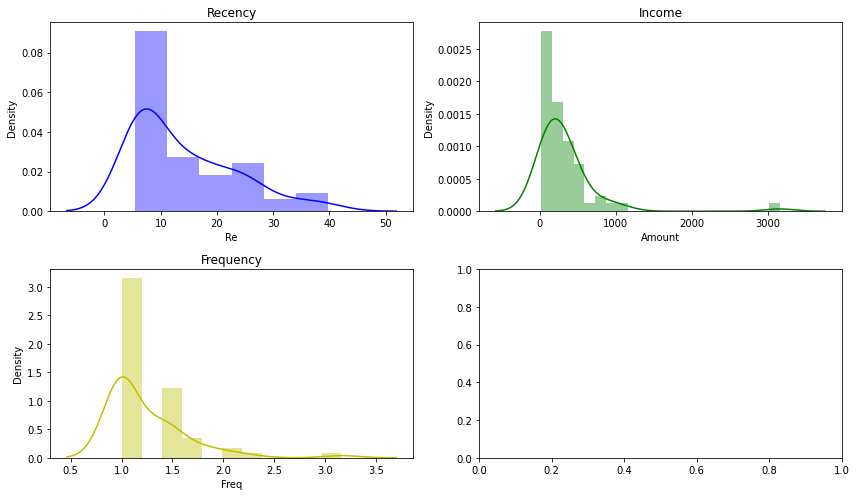

In [46]:
fig, ax = plt.subplots(2, 2, figsize=(12, 7))

fig = sns.distplot(square_trans.Re, color='b', ax=ax[0, 0])
fig = sns.distplot(square_trans.Amount, color='g', ax=ax[0, 1])
fig = sns.distplot(square_trans.Freq, color='y', ax=ax[1, 0])
ax[0, 0].set_title('Recency')
ax[0, 1].set_title('Income')
ax[1, 0].set_title('Frequency')

plt.tight_layout()
plt.show()

<b>BOX COX Transfromation gives normality closer to 0</b>

### Normalization

In [47]:
scale = StandardScaler()
scale.fit(boxcox_trans)
electric_normalized = scale.transform(boxcox_trans)

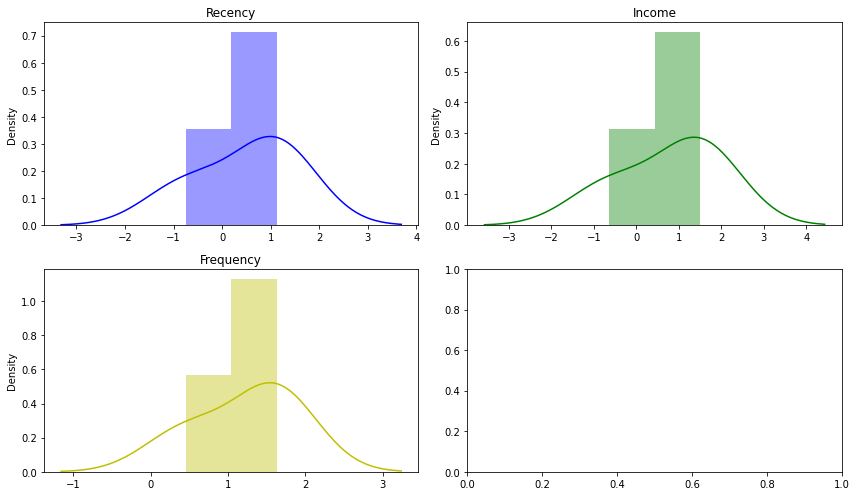

[-0. -0.  0.]
[1. 1. 1.]


In [48]:
fig, ax = plt.subplots(2, 2, figsize=(12, 7))

fig = sns.distplot(electric_normalized[0], color='b', ax=ax[0, 0])
fig = sns.distplot(electric_normalized[1], color='g', ax=ax[0, 1])
fig = sns.distplot(electric_normalized[2], color='y', ax=ax[1, 0])
ax[0, 0].set_title('Recency')
ax[0, 1].set_title('Income')
ax[1, 0].set_title('Frequency')

plt.tight_layout()
plt.show()

print(electric_normalized.mean(axis = 0).round(2))
print(electric_normalized.std(axis = 0).round(2))

## Clustering

### Hyperparameter Tuning using the Elbow Method

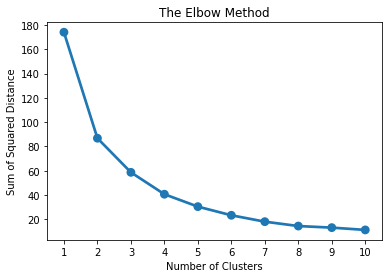

In [49]:
sse = {}

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(electric_normalized)
    sse[k] = kmeans.inertia_
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distance')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [50]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(electric_normalized)
model.labels_

array([2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 0, 2, 1, 2,
       2, 1, 2, 1, 2, 1, 1, 1, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0,
       2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

### Matching labels with each customer

In [51]:
elec_customers["Cluster"] = model.labels_
elec_customers.groupby('Cluster').agg({
    'Re':'mean',
    'Freq':'mean',
    'Amount':['mean', 'count']}).round(2)

Re  Freq     Amount      
           mean  mean       mean count
Cluster                               
0         46.14  1.00  122793.18    22
1        176.36  1.00   10640.79    14
2        579.05  2.86  675977.91    22

### Melting the Dataframe

In [52]:
df_normalized = pd.DataFrame(electric_normalized, columns=['Re', 'Freq', 'Amount'])
df_normalized['Cust ID'] = elec_customers.index
df_normalized['Cluster'] = model.labels_

df_nor_melt = pd.melt(df_normalized.reset_index(),
                      id_vars=['Cust ID', 'Cluster'],
                      value_vars=['Re','Freq','Amount'],
                      var_name='Attribute',
                      value_name='Value')
df_nor_melt

,Cust ID,Cluster,Attribute,Value
0,18,2,Re,-0.747796
1,49,2,Re,-0.632139
2,56,2,Re,0.453021
3,86,2,Re,1.735696
4,172,2,Re,0.412856
...,...,...,...,...
169,2419,0,Amount,-1.047661
170,2421,0,Amount,-1.261264
171,2499,0,Amount,-0.995070
172,2632,0,Amount,-1.296402


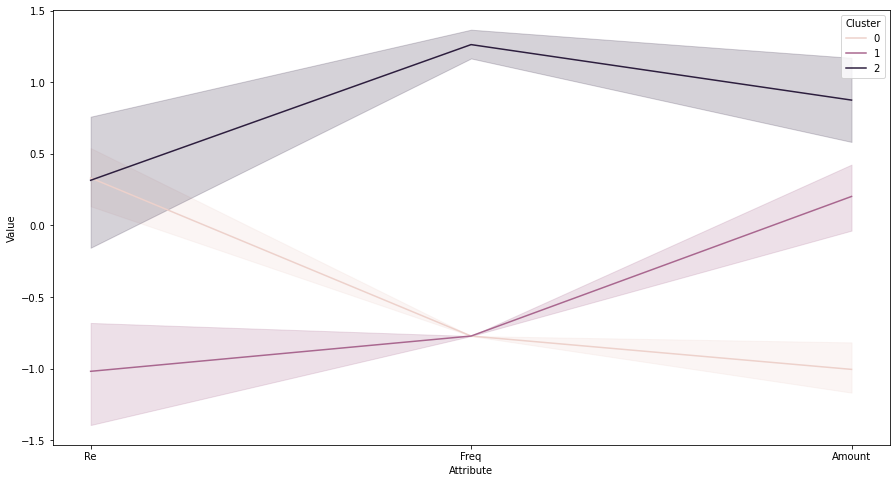

In [53]:
plt.figure(figsize=(15, 8))
sns.lineplot('Attribute', 'Value', hue='Cluster', data=df_nor_melt)
plt.show()